In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from scipy.signal import find_peaks, peak_prominences
import glob
import os
from sklearn.linear_model import LinearRegression
import csv
from scipy.interpolate import interp1d

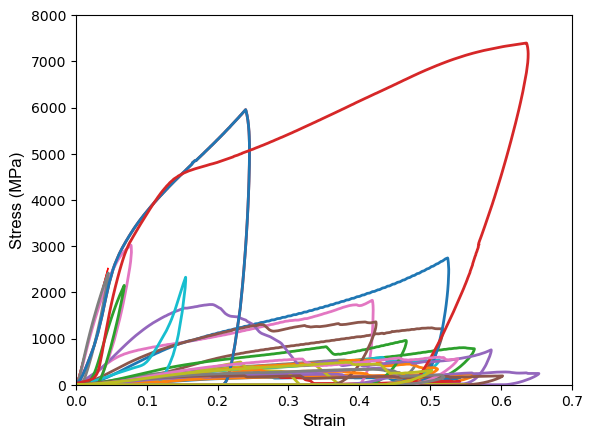

In [160]:
#Batch import multiple csv files from a folder
folder_path = '/Users/alt2005/Nanoindentation Data and Code for Nikas'
csv_files = glob.glob(os.path.join(folder_path, '**', '*.csv'), recursive=True)

strain = []
stress = []
file_labels = []

#Assign values to x and y columns of each  
for data_file in csv_files:
    
    stress_strain_data = np.loadtxt(data_file, delimiter=',', skiprows=1)
    x = stress_strain_data[stress_strain_data[:,0]>0,0]
    y = stress_strain_data[stress_strain_data[:,0]>0,1]
    strain.append(x)
    stress.append(y)
    file_name = os.path.splitext(os.path.basename(data_file))[0]
    file_labels.append(file_name)
    p = pd.read_csv(data_file) 
    # print(p.describe())

    

# Loop through each x and y array and plot them
for i, (x, y, label) in enumerate(zip(strain, stress,file_labels)):
    plt.plot(x, y, label = label, linewidth = 2)  # Label each line with the file index


plt.xlabel('Strain', fontsize=12, fontfamily = 'arial')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily = 'arial')
plt.ylim(0,8000)
plt.xlim(0, 0.7)
plt.savefig('Silica Lattice Control.jpeg', dpi=300, bbox_inches='tight')
plt.show()



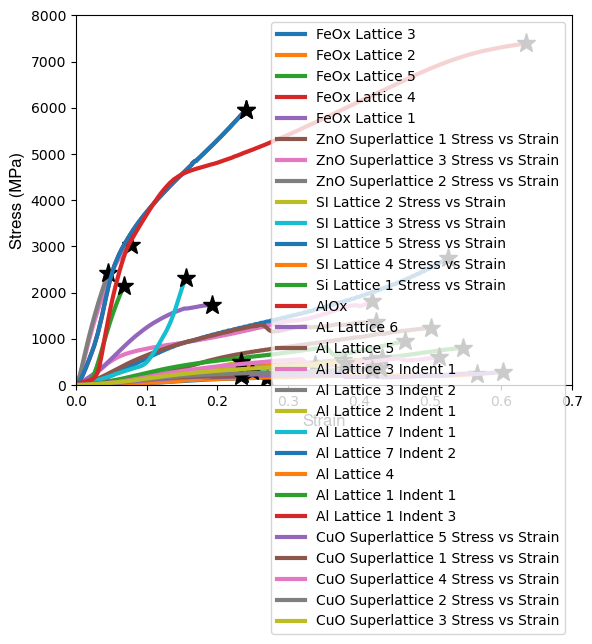

In [161]:
# Plot up to maximum 
for i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):
    # Find the index of the maximum stress value
    max_stress_index = np.argmax(y)
    
    # Filter the strain and stress arrays up to the maximum stress
    x_up_to_max = x[:max_stress_index + 1]
    y_up_to_max = y[:max_stress_index + 1]
    
    ''' 
    print(max_stress_index)
    print(x[max_stress_index])
    print(y[max_stress_index])
    '''
    #Plot data up to local maxima

    plt.rcParams['font.weight'] = 'normal'
    plt.plot(x_up_to_max, y_up_to_max, label = label, linewidth = 3)
    
    #Show brittle fracture point on graph
    plt.plot(x[max_stress_index], y[max_stress_index], marker='*', color = 'black', markersize = 14)

plt.ylim(0,8000)
plt.xlim(0, 0.7)
plt.xlabel('Strain', fontsize=12, fontfamily = 'helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily = 'helvetica')
plt.legend()
plt.show()




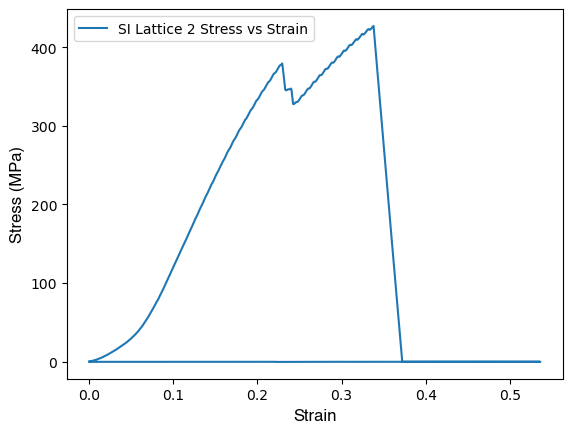

2170
2159


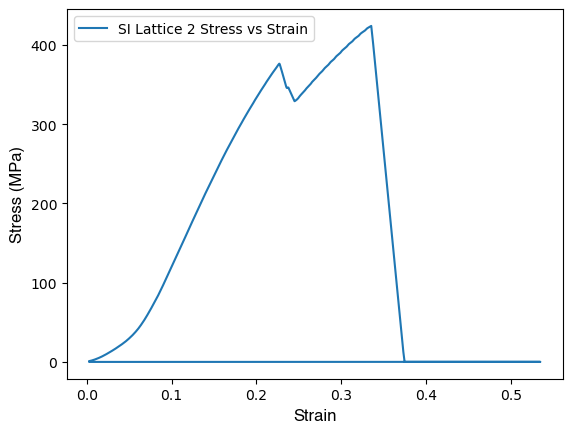

In [162]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.plot(strain[8], stress[8], label=file_labels[8])
plt.legend()
plt.xlabel('Strain', fontsize=12, fontfamily = 'helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily = 'helvetica')
plt.show()

window_size_v = 12
smoothed_strain = [moving_average(s, window_size=window_size_v) for s in strain]
smoothed_stress = [moving_average(s, window_size=window_size_v) for s in stress]

print(len(stress[8]))
print(len(smoothed_stress[8]))

plt.plot(smoothed_strain[8], smoothed_stress[8], label=file_labels[8])
plt.legend()
plt.xlabel('Strain', fontsize=12, fontfamily = 'helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily = 'helvetica')
plt.show()



[ 896 1159 1312]
<class 'numpy.ndarray'>
(array([ 12.44918,  33.07319, 231.71983]), array([0, 0, 0]), array([ 933, 1178, 1955]))
<class 'tuple'>


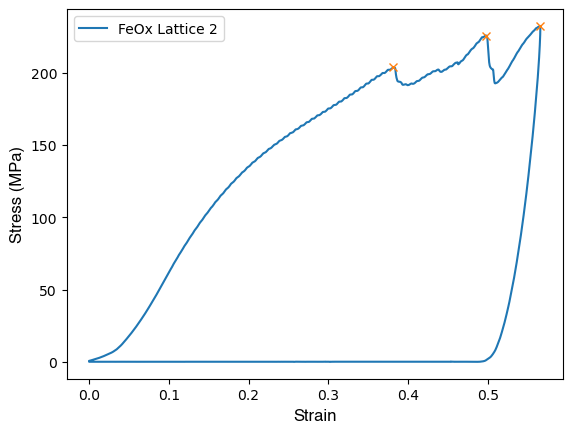

In [163]:
index_of_graph = 1
peaks, info_peaks = find_peaks(stress[index_of_graph], distance=10, prominence=10)
prominences = peak_prominences(stress[index_of_graph], peaks=peaks)

print(peaks)
print(type(peaks))
print(prominences)
print(type(prominences))

plt.plot(strain[index_of_graph], stress[index_of_graph], label = file_labels[index_of_graph])
plt.xlabel('Strain', fontsize=12, fontfamily='helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily='helvetica')
plt.plot(strain[index_of_graph][peaks], stress[index_of_graph][peaks], "x")
plt.legend()

plt.savefig('Al_Lattice6_stress_strain_graph_peaks.jpeg')
plt.show()

    

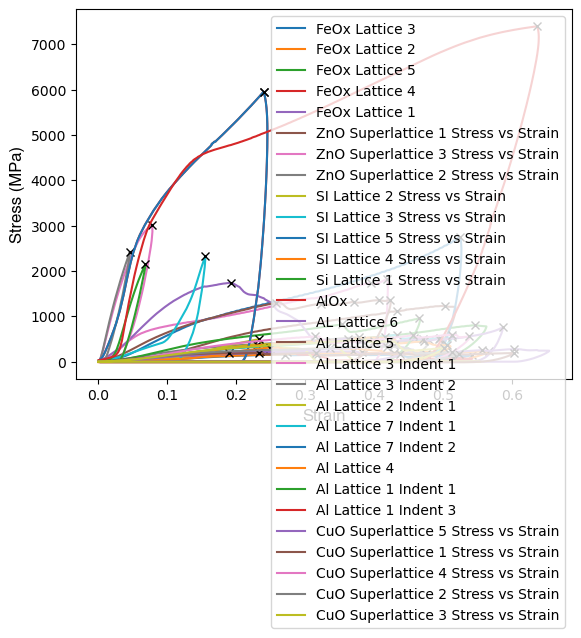

{'FeOx Lattice 3': {'Index': 0, 'stress_peaks': array([ 578,  673, 1128])}, 'FeOx Lattice 2': {'Index': 1, 'stress_peaks': array([ 896, 1159, 1312])}, 'FeOx Lattice 5': {'Index': 2, 'stress_peaks': array([1155])}, 'FeOx Lattice 4': {'Index': 3, 'stress_peaks': array([ 497,  572, 1041])}, 'FeOx Lattice 1 ': {'Index': 4, 'stress_peaks': array([ 990, 1132, 1472, 1597])}, 'ZnO Superlattice 1 Stress vs Strain': {'Index': 5, 'stress_peaks': array([ 974, 1125])}, 'ZnO Superlattice 3 Stress vs Strain': {'Index': 6, 'stress_peaks': array([ 948, 1004])}, 'ZnO Superlattice 2 Stress vs Strain': {'Index': 7, 'stress_peaks': array([ 840, 1039])}, 'SI Lattice 2 Stress vs Strain': {'Index': 8, 'stress_peaks': array([523, 750])}, 'SI Lattice 3 Stress vs Strain': {'Index': 9, 'stress_peaks': array([ 936,  976, 1049, 1087])}, 'SI Lattice 5 Stress vs Strain': {'Index': 10, 'stress_peaks': array([1138])}, 'SI Lattice 4 Stress vs Strain': {'Index': 11, 'stress_peaks': array([801, 892, 942])}, 'Si Lattice 1 

In [164]:
graph_info_dict = {}
smooth_graph_info_dict = {}

for i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):
    
    peaks, _ = find_peaks(y, distance=10, prominence=10)
    smooth_peaks, _ = find_peaks(smoothed_stress[i], distance=10, prominence=10)

    if label not in graph_info_dict:
        graph_info_dict[label] = {}
    graph_info_dict[label]["Index"] = i 
    
    if label not in smooth_graph_info_dict: 
        smooth_graph_info_dict[label] = {}
    smooth_graph_info_dict[label]["Index"] = i

    graph_info_dict[label]["stress_peaks"] = peaks
    smooth_graph_info_dict[label]["stress_peaks"] = smooth_peaks

    plt.plot(x, y, label=label)
    plt.xlabel('Strain', fontsize=12, fontfamily='helvetica')
    plt.ylabel('Stress (MPa)', fontsize=12, fontfamily='helvetica')
    plt.plot(x[peaks], y[peaks], "x", color="black")

plt.legend()
plt.show()

# Print the peaks dictionary
print(graph_info_dict)




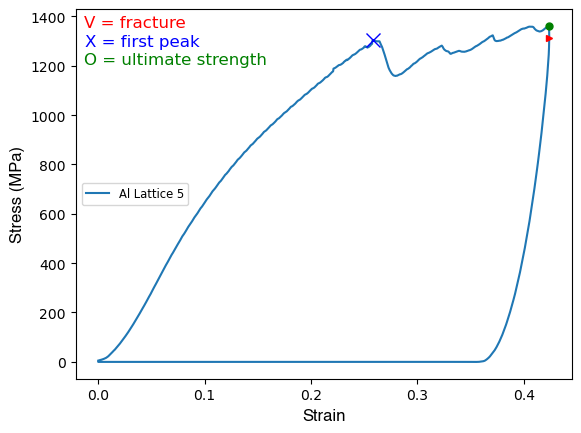

In [165]:
label = 'Al Lattice 5'
index_of_graph = graph_info_dict[label]['Index']
peaks, info_peaks = find_peaks(stress[index_of_graph], distance=10, prominence=10)

x = strain[index_of_graph]
y = stress[index_of_graph]

plt.plot(x, y, label = file_labels[index_of_graph])
plt.xlabel('Strain', fontsize=12, fontfamily='helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily='helvetica')

first_peak = graph_info_dict[label]['stress_peaks'][0]
max_peak = graph_info_dict[label]["stress_peaks"][np.argmax(y[graph_info_dict[label]["stress_peaks"]])]
fracture = np.where(np.diff(x) < 0)[0][0]

plt.plot(x[first_peak], y[first_peak], "x", color="blue", markersize=10)
plt.plot(x[max_peak], y[max_peak], "o", color="green", markersize=5)
plt.plot(x[fracture], y[fracture], ">", color="red", markersize=5)

plt.annotate('X = first peak', xy=(0.135, 0.9), xycoords='axes fraction', fontsize=12, color='blue', ha='center')
plt.annotate('O = ultimate strength', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12, color='green', ha='center')
plt.annotate('V = fracture', xy=(0.12, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='center')

plt.legend(fontsize='small')
plt.savefig('Al_Lattice6_stress_strain_graph_imp_points.jpeg')
plt.show()




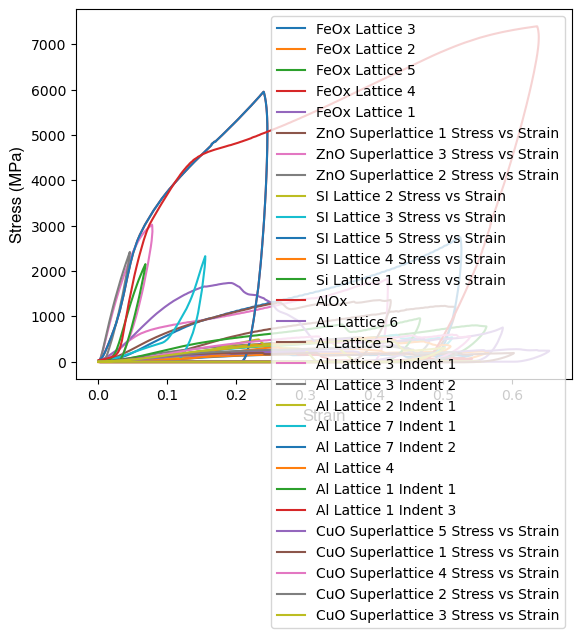

{'FeOx Lattice 3': {'Index': 0, 'stress_peaks': array([ 578,  673, 1128]), 'first_peak': 578, 'ultimate_str': 578, 'fracture_p': 1129}, 'FeOx Lattice 2': {'Index': 1, 'stress_peaks': array([ 896, 1159, 1312]), 'first_peak': 896, 'ultimate_str': 1312, 'fracture_p': 1313}, 'FeOx Lattice 5': {'Index': 2, 'stress_peaks': array([1155]), 'first_peak': 1155, 'ultimate_str': 1155, 'fracture_p': 1187}, 'FeOx Lattice 4': {'Index': 3, 'stress_peaks': array([ 497,  572, 1041]), 'first_peak': 497, 'ultimate_str': 497, 'fracture_p': 1094}, 'FeOx Lattice 1 ': {'Index': 4, 'stress_peaks': array([ 990, 1132, 1472, 1597]), 'first_peak': 990, 'ultimate_str': 1597, 'fracture_p': 1720}, 'ZnO Superlattice 1 Stress vs Strain': {'Index': 5, 'stress_peaks': array([ 974, 1125]), 'first_peak': 974, 'ultimate_str': 1125, 'fracture_p': 1158}, 'ZnO Superlattice 3 Stress vs Strain': {'Index': 6, 'stress_peaks': array([ 948, 1004]), 'first_peak': 948, 'ultimate_str': 1004, 'fracture_p': 1020}, 'ZnO Superlattice 2 Str

In [166]:
# Yield strength = first maximum after the linear region 
# Ultimate strength = global maximum -> in this data, yield strength = ultimate strength for most 
# Fracture point = end of the curve -> stress is typically lower than at ultimate strength because of necking (or weakening)
# Create a dictionary to store the first_peak, max_peak, and fracture for each graph

for i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):
    plt.plot(x, y, label=label)
    plt.xlabel('Strain', fontsize=12, fontfamily='helvetica')
    plt.ylabel('Stress (MPa)', fontsize=12, fontfamily='helvetica')
    
    first_peak = graph_info_dict[label]['stress_peaks'][0]
    max_peak = graph_info_dict[label]["stress_peaks"][np.argmax(y[graph_info_dict[label]["stress_peaks"]])]
    fracture = np.where(np.diff(x) < 0)[0][0]

    # industry standard for yield strength is to shift linear regression slope by 0.2% so I cannot find it currently 

    first_peak_smooth = smooth_graph_info_dict[label]['stress_peaks'][0]
    max_peak_smooth = smooth_graph_info_dict[label]["stress_peaks"][np.argmax(smoothed_stress[i][smooth_graph_info_dict[label]["stress_peaks"]])]
    fracture_smooth = np.where(np.diff(smoothed_strain[i]) < 0)[0][0]

    # Store the peak information in the dictionary
    graph_info_dict[label]['first_peak'] = first_peak
    graph_info_dict[label]['ultimate_str'] = max_peak
    graph_info_dict[label]['fracture_p'] = fracture 

    smooth_graph_info_dict[label]['first_peak'] = first_peak_smooth
    smooth_graph_info_dict[label]['ultimate_str'] = max_peak_smooth
    smooth_graph_info_dict[label]['fracture_p'] = fracture_smooth
    
plt.legend()
plt.show()

print(graph_info_dict)


coefficient of determination: 0.9956675878229977
intercept: -50.2304315279066
slope: 56592.48132022642


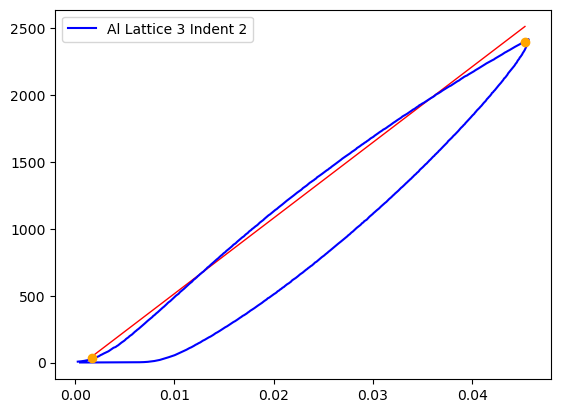

In [ ]:
# Young's modulus via analyzing the slope after the initial tail 
# Example on one graph 

label_of_graph = 'Al Lattice 3 Indent 2'
index_of_graph = smooth_graph_info_dict[label_of_graph]['Index']

i_end = smooth_graph_info_dict[label_of_graph]['first_peak']

filtered_strain_end = smoothed_strain[index_of_graph][:i_end]
filtered_stress_end = smoothed_stress[index_of_graph][:i_end]

sufficient_i_start = 0
best_r_sq = 0 

model = LinearRegression()

for i_start in range(i_end):
    filtered_strain_start_end = smoothed_strain[index_of_graph][i_start:i_end]
    filtered_stress_start_end = smoothed_stress[index_of_graph][i_start:i_end]
    model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    if r_sq > 0.98: 
        best_r_sq = r_sq
        sufficient_i_start = i_start
        break 

print(f"coefficient of determination: {best_r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

regression_strain = smoothed_strain[index_of_graph][sufficient_i_start:i_end]
regression_stress = smoothed_stress[index_of_graph][sufficient_i_start:i_end]

model.fit(regression_strain.reshape(-1, 1), regression_stress)

plt.plot(regression_strain, model.predict(regression_strain.reshape(-1, 1)), color='red', linewidth=1)
plt.plot(strain[index_of_graph], stress[index_of_graph], label=label_of_graph, color="blue")
plt.plot(regression_strain[sufficient_i_start], regression_stress[sufficient_i_start],"o",color="orange")
plt.plot(regression_strain[i_end-1], regression_stress[i_end-1], "o", color="orange")

plt.legend()
plt.show()


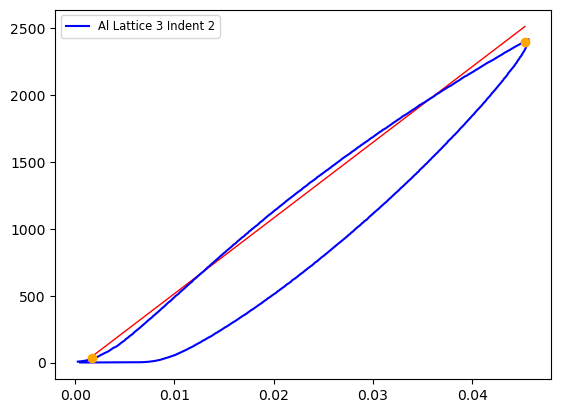

In [168]:
# Yield strength = intersection of linear regression that was shifted right by 0.2% strain

intercept = model.intercept_
slope = model.coef_[0]

OFFSET = 0.002

# stress = slope * (strain + OFFSET) + intercept
shifted_linreg_stress = slope * (smoothed_strain[index_of_graph] - OFFSET) + intercept 

# difference between the original graph and shifted linear regression
difference = smoothed_stress[index_of_graph] - shifted_linreg_stress

# intersection indices where the difference changes sign
intersection_indices = np.where(np.diff(np.sign(difference)))[0]

if len(intersection_indices) != 0:
    intersection_index = intersection_indices[0]

    for i in intersection_indices:
        if strain[index_of_graph][i] > strain[index_of_graph][intersection_index]:
            intersection_index = i
else: 
    intersection_index = graph_info_dict[label]['first_peak']

plt.plot(regression_strain, model.predict(regression_strain.reshape(-1, 1)), color='red', linewidth=1)
plt.plot(strain[index_of_graph], stress[index_of_graph], label=label_of_graph, color="blue")
plt.plot(regression_strain[sufficient_i_start], regression_stress[sufficient_i_start],"o",color="orange")
plt.plot(regression_strain[i_end-1], regression_stress[i_end-1], "o", color="orange")

# plt.annotate('X = yield strength', xy=(0.17, 0.9), xycoords='axes fraction', fontsize=12, color='blue', ha='center')
# plt.annotate('O = ultimate strength', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12, color='green', ha='center')
# plt.annotate('V = fracture', xy=(0.12, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='center')

plt.legend(fontsize='small')
plt.show()

# Update the graph_info_dict with the yield strength
graph_info_dict[label_of_graph]['yield_str_1'] = stress[index_of_graph][intersection_index]

# print(graph_info_dict)



Graph 0: coefficient of determination: 0.9801148823453512
Graph 0: intercept: -21.922934876514134
Graph 0: slope or ym: 721.0701213463223


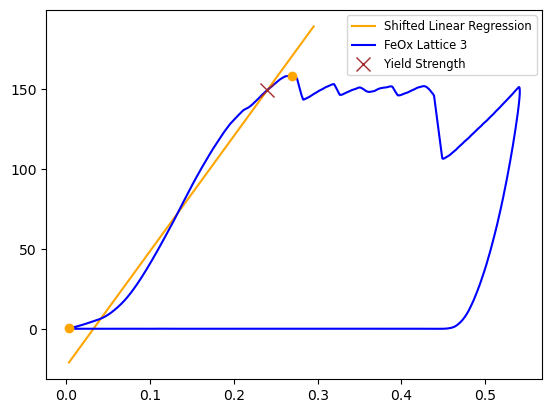

Graph 1: coefficient of determination: 0.9800695211571923
Graph 1: intercept: 41.93611660189298
Graph 1: slope or ym: 441.0504692449247


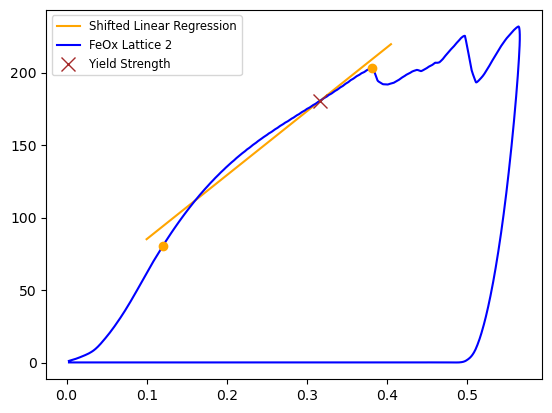

Graph 2: coefficient of determination: 0.992148371535275
Graph 2: intercept: -8.240114623625345
Graph 2: slope or ym: 1434.3440762027924


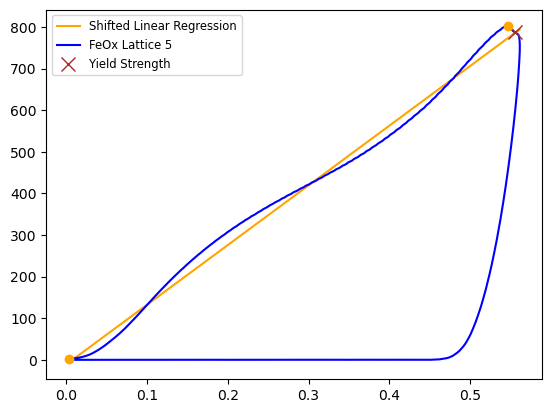

Graph 3: coefficient of determination: 0.9925141367900709
Graph 3: intercept: -26.54130644566979
Graph 3: slope or ym: 1187.3371723890314


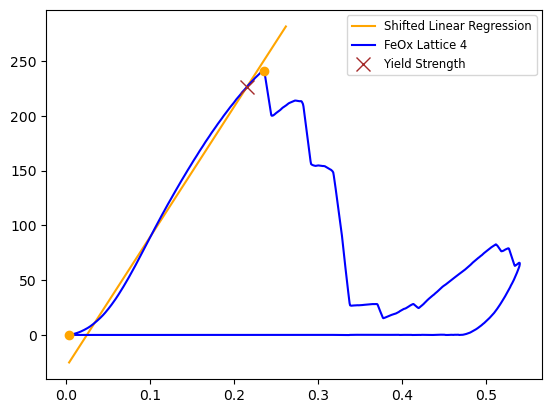

Graph 4: coefficient of determination: 1.0
Graph 4: intercept: 228.08264083333333
Graph 4: slope or ym: 0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


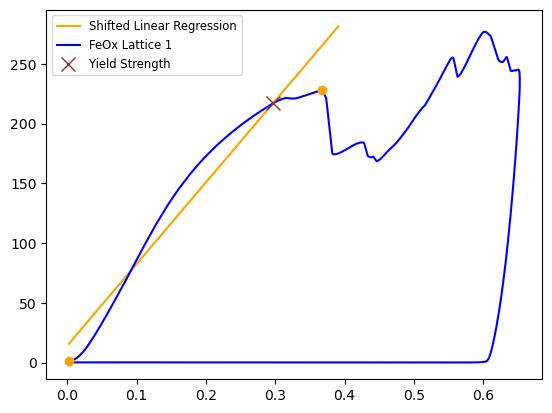

Graph 5: coefficient of determination: 0.982579906515469
Graph 5: intercept: -43.86116381398233
Graph 5: slope or ym: 2749.5753111002164


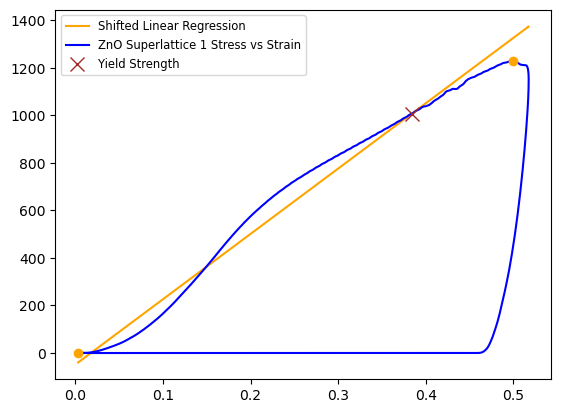

Graph 6: coefficient of determination: 0.9802443873499197
Graph 6: intercept: 382.382945013916
Graph 6: slope or ym: 3357.190002586107


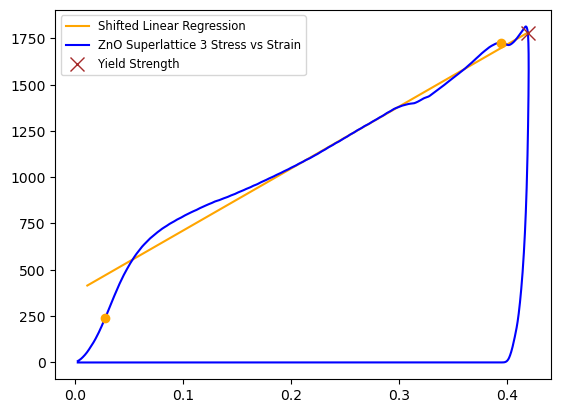

Graph 7: coefficient of determination: 0.9800901326247582
Graph 7: intercept: 104.73264016968
Graph 7: slope or ym: 1184.2926041343085


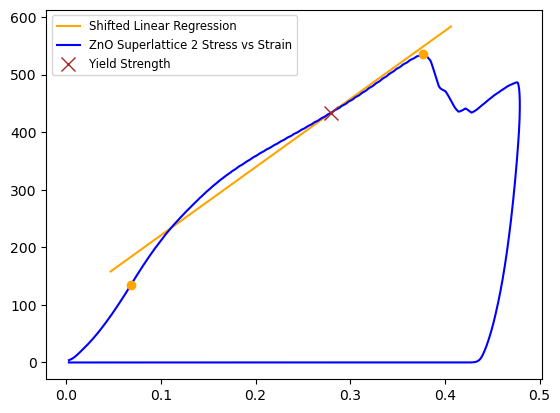

Graph 8: coefficient of determination: 0.9842892211676071
Graph 8: intercept: -54.49184778870767
Graph 8: slope or ym: 1901.669112567217


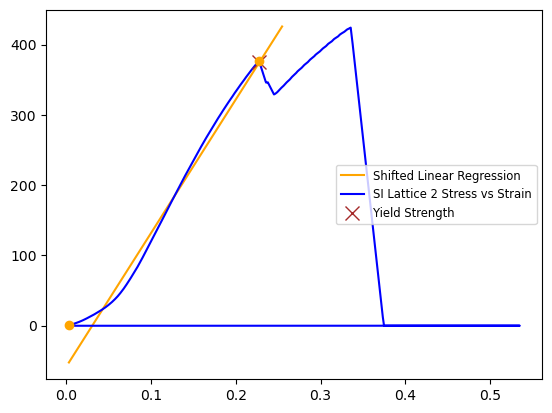

Graph 9: coefficient of determination: 0.9900578813526808
Graph 9: intercept: 4.660699152918198
Graph 9: slope or ym: 1332.0420464594758


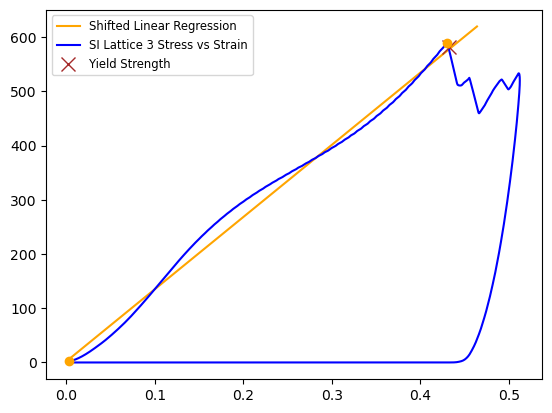

Graph 10: coefficient of determination: 0.9897911887978665
Graph 10: intercept: 60.21184478230953
Graph 10: slope or ym: 4823.845979737389


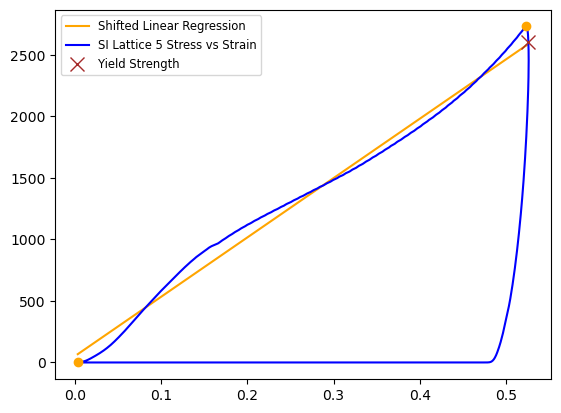

Graph 11: coefficient of determination: 0.9800258466076729
Graph 11: intercept: 88.39361595597171
Graph 11: slope or ym: 1131.1697210414889


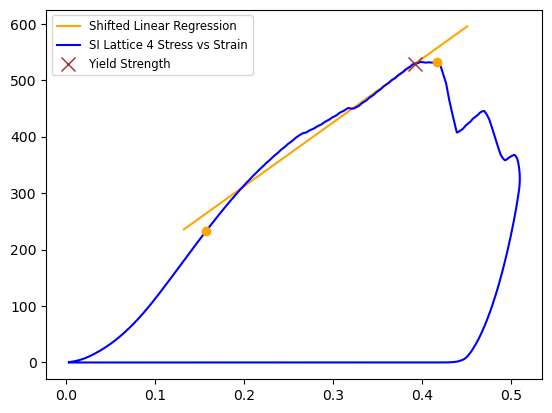

Graph 12: coefficient of determination: 0.9827370279184431
Graph 12: intercept: 11.120276106100903
Graph 12: slope or ym: 2411.161754684084


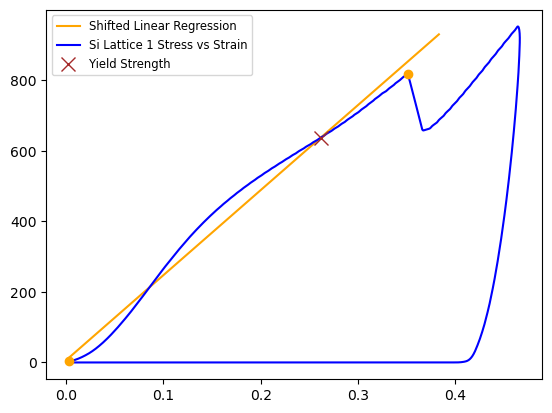

Graph 13: coefficient of determination: 0.9801039388883422
Graph 13: intercept: 1786.104888184343
Graph 13: slope or ym: 17942.810173950238


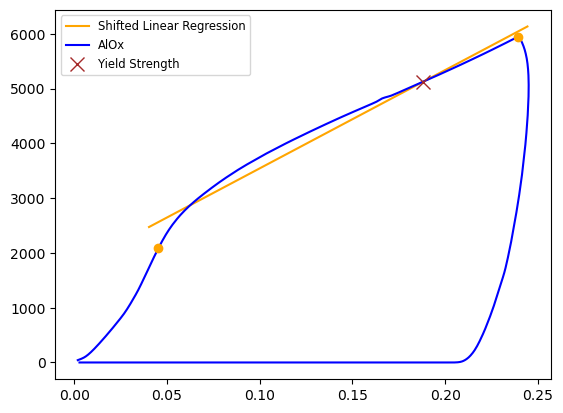

Graph 14: coefficient of determination: 1.0
Graph 14: intercept: 1736.1088583333333
Graph 14: slope or ym: 0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


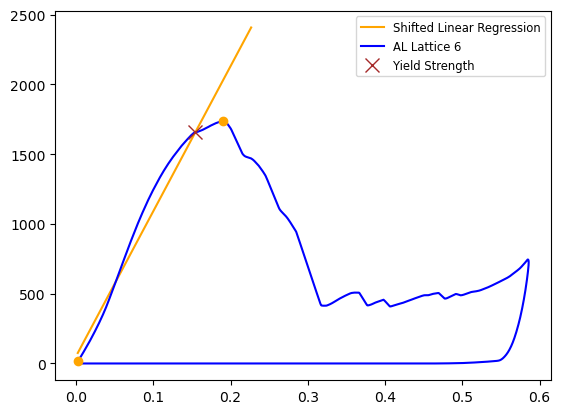

Graph 15: coefficient of determination: 0.9800344493621883
Graph 15: intercept: 154.82550737847248
Graph 15: slope or ym: 4701.944103506626


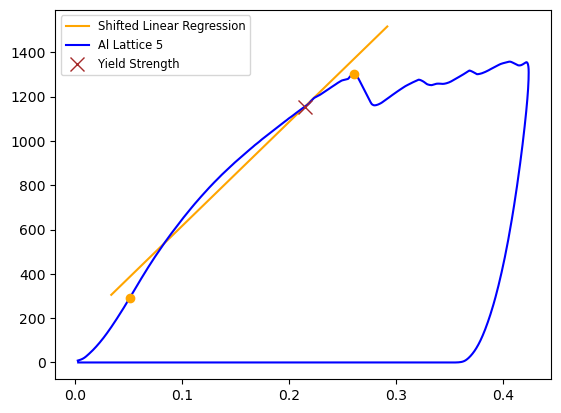

Graph 16: coefficient of determination: 1.0
Graph 16: intercept: 3005.307939166667
Graph 16: slope or ym: 0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


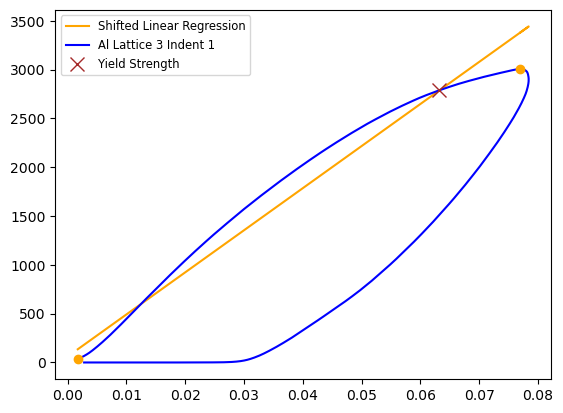

Graph 17: coefficient of determination: 0.9956675878229977
Graph 17: intercept: -50.2304315279066
Graph 17: slope or ym: 56592.48132022642


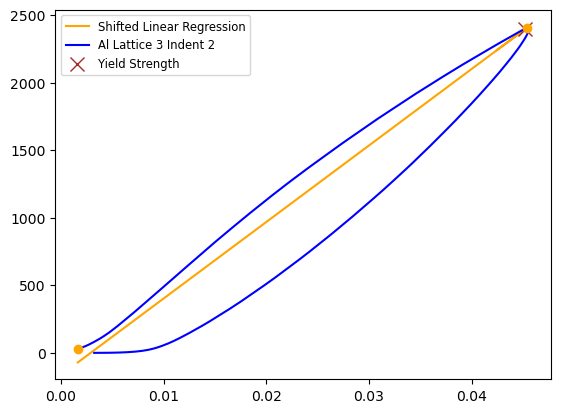

Graph 18: coefficient of determination: 0.9802600132891516
Graph 18: intercept: -256.30306982744787
Graph 18: slope or ym: 3202.490772267205


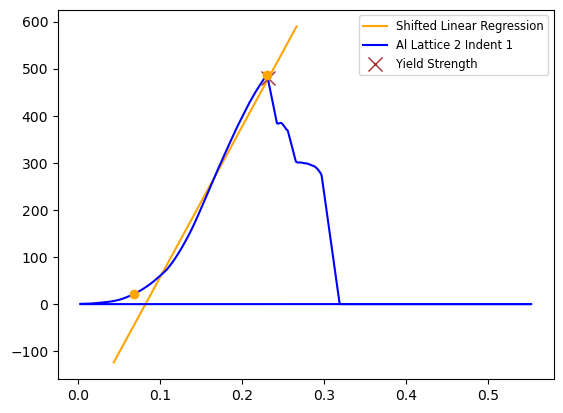

Graph 19: coefficient of determination: 0.9800226513123261
Graph 19: intercept: -3196.5637540684334
Graph 19: slope or ym: 34816.165131795875


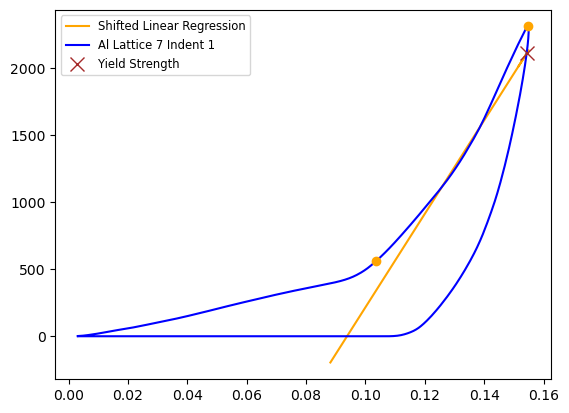

Graph 20: coefficient of determination: 0.9801039388883422
Graph 20: intercept: 1786.104888184343
Graph 20: slope or ym: 17942.810173950238


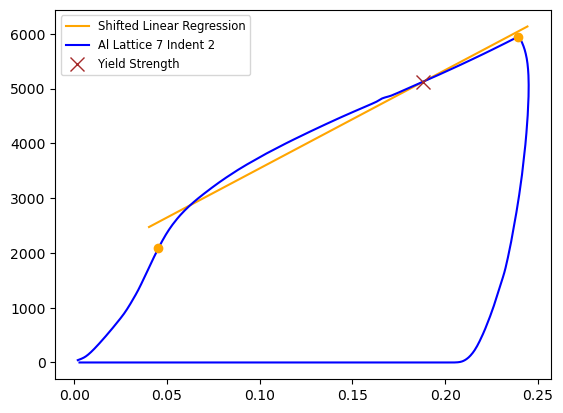

Graph 21: coefficient of determination: 0.9800451186889642
Graph 21: intercept: -175.51638767857477
Graph 21: slope or ym: 1942.8923078125429


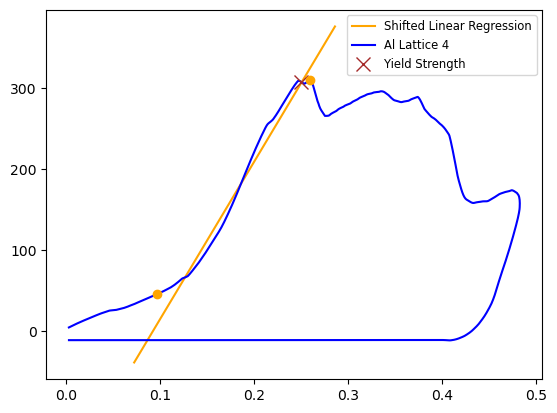

Graph 22: coefficient of determination: 0.9810359699024186
Graph 22: intercept: -752.6236778966555
Graph 22: slope or ym: 42906.758710850314


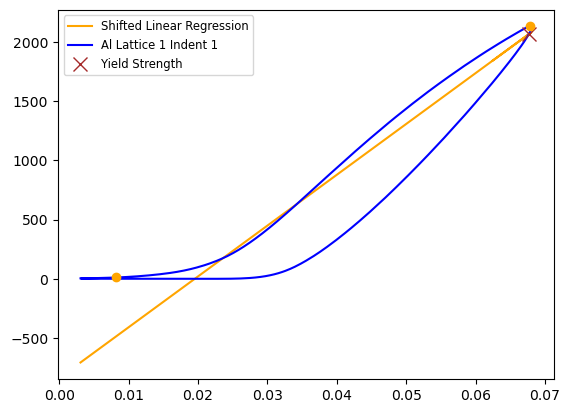

Graph 23: coefficient of determination: 0.9800346364344884
Graph 23: intercept: 3280.167523519705
Graph 23: slope or ym: 7024.493970414012


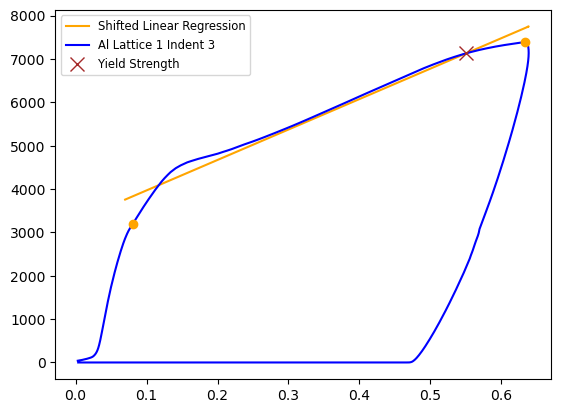

Graph 24: coefficient of determination: 0.9800075324693929
Graph 24: intercept: 28.702635894039304
Graph 24: slope or ym: 774.8696796513464


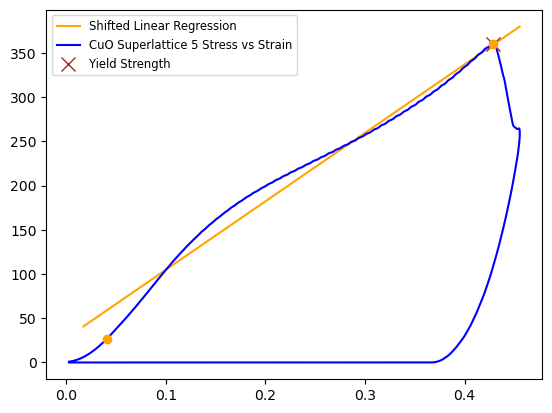

Graph 25: coefficient of determination: 0.9800115698213901
Graph 25: intercept: 55.055322193820146
Graph 25: slope or ym: 785.4402982849299


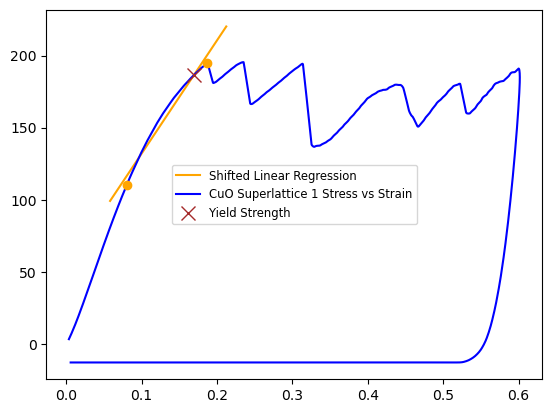

Graph 26: coefficient of determination: 0.9850235675700985
Graph 26: intercept: -24.063458023588737
Graph 26: slope or ym: 2009.4564414594206


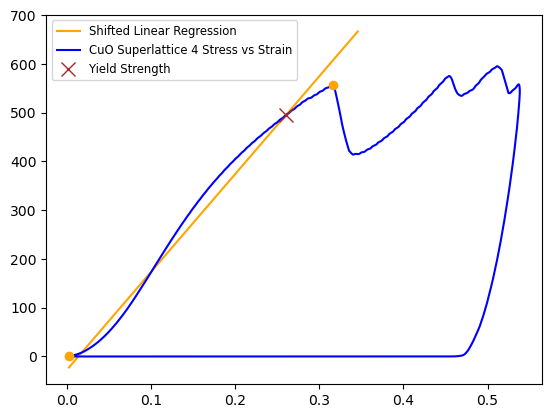

Graph 27: coefficient of determination: 0.9801176910523869
Graph 27: intercept: 120.91065789931929
Graph 27: slope or ym: 537.3979433525536


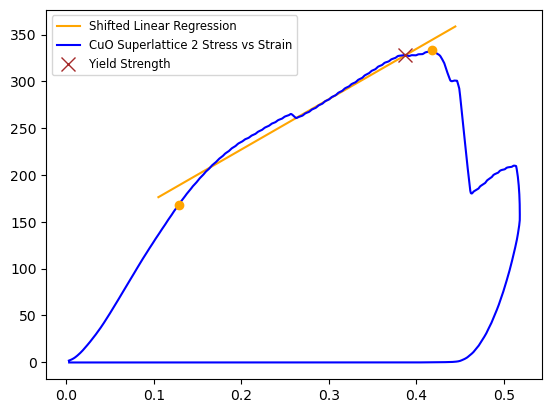

Graph 28: coefficient of determination: 0.9800716242825925
Graph 28: intercept: 68.4151531928432
Graph 28: slope or ym: 1124.6996910358046


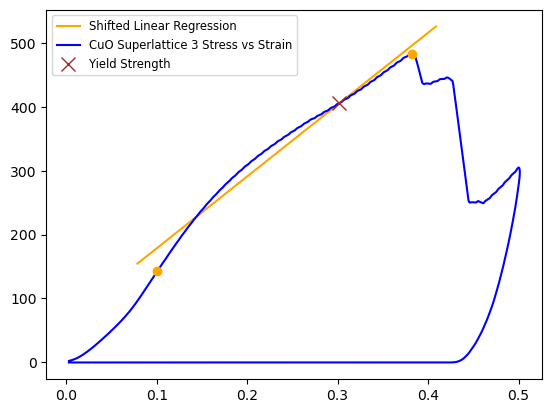

In [182]:
# Now all graphs

for index_of_graph, (x_smooth, y_smooth, label) in enumerate(zip(smoothed_strain, smoothed_stress, file_labels)):

    x = strain[index_of_graph]
    y = stress[index_of_graph]
    
    i_end = smooth_graph_info_dict[label]['first_peak']

    filtered_strain_end = x_smooth[:i_end]
    filtered_stress_end = y_smooth[:i_end]

    sufficient_i_start = 0
    best_r_sq = 0 

    model = LinearRegression()

    # for i_start in range(i_end):
    #     filtered_strain_start_end = x_smooth[i_start:i_end]
    #     filtered_stress_start_end = y_smooth[i_start:i_end]
    #     model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    #     r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    #     if r_sq > 0.98: 
    #         best_r_sq = r_sq
    #         sufficient_i_start = i_start
    #         break 

    for i_start in range(i_end): 
        filtered_strain_start_end = x_smooth[i_start:i_end]
        filtered_stress_start_end = y_smooth[i_start:i_end]
        model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
        r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
        if r_sq > best_r_sq: 
            best_r_sq = r_sq
        if best_r_sq > 0.98 and i_start < i_end/2: 
            sufficient_i_start = i_start
            break 


    print(f"Graph {index_of_graph}: coefficient of determination: {best_r_sq}")
    print(f"Graph {index_of_graph}: intercept: {model.intercept_}")
    print(f"Graph {index_of_graph}: slope or ym: {float(model.coef_[0])}")

    graph_info_dict[label]['young_moduli_1'] = float(model.coef_[0])
    graph_info_dict[label]['significant_slope_change_index'] = sufficient_i_start

    max_peak = graph_info_dict[label]['ultimate_str']
    fracture = graph_info_dict[label]['fracture_p']

    # 
    regression_strain = x_smooth[sufficient_i_start:i_end]
    regression_stress = y_smooth[sufficient_i_start:i_end]

    model.fit(regression_strain.reshape(-1, 1), regression_stress)

    # Yield strength = intersection of linear regression that was shifted right by 0.2% strain

    intercept = model.intercept_
    slope = model.coef_[0]

    OFFSET = 0.002

    # stress = slope * (strain + OFFSET) + intercept
    shifted_linreg_stress = slope * (x_smooth - OFFSET) + intercept 

    # difference between the original graph and shifted linear regression
    difference = y_smooth - shifted_linreg_stress

    # intersection indices where the difference changes sign
    intersection_indices = np.where(np.diff(np.sign(difference)))[0]

    # pick the last intersection index
    if len(intersection_indices) != 0:
        yield_str_index = intersection_indices[0]

        for i in intersection_indices:
            if y[i] > y[yield_str_index]:
                yield_str_index = i
    else: 
        yield_str_index = graph_info_dict[label]['first_peak']



    # figuring out nice points to start and end drawing of regression
    plotting_start = sufficient_i_start
    if plotting_start>50: 
        plotting_start -= 50
    else: # plotting start <=10
        plotting_start = 0 
    
    plotting_end = i_end
    if plotting_end < yield_str_index:
        plotting_end = yield_str_index
    
    plotting_end += 50

    # shifted linear regression lines
    plt.plot(x_smooth[plotting_start:plotting_end], shifted_linreg_stress[plotting_start:plotting_end], color='orange', label="Shifted Linear Regression")

    x = x_smooth
    y = y_smooth 
    # original stress-strain curve
    plt.plot(x, y, label=label, color="blue")

    # yield strength point
    plt.plot(x[yield_str_index], y[yield_str_index], "x", color="brown", markersize=10, label="Yield Strength")
    # significant slope change 
    plt.plot(x[sufficient_i_start], y[sufficient_i_start], "o", color="orange")
    plt.plot(x[i_end], y[i_end], "o", color="orange")

    plt.legend(fontsize='small')
    plt.show()

    # Update the graph_info_dict with the yield strength
    graph_info_dict[label]['yield_str_1'] = y[yield_str_index]

    # print(graph_info_dict)

    

In [170]:
print(graph_info_dict)
# Define the CSV file name
csv_file = 'graph_info_dict.csv'

# Extract the keys from the first dictionary entry to use as headers
headers = ['Label'] + list(graph_info_dict[next(iter(graph_info_dict))].keys())

# Write the dictionary to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    for label, info in graph_info_dict.items():
        row = [label] + list(info.values())
        writer.writerow(row)

print(f"Dictionary has been written to {csv_file}")


{'FeOx Lattice 3': {'Index': 0, 'stress_peaks': array([ 578,  673, 1128]), 'first_peak': 578, 'ultimate_str': 578, 'fracture_p': 1129, 'young_moduli_1': 616.3785085570839, 'significant_slope_change_index': 287, 'yield_str_1': 151.22733333333332}, 'FeOx Lattice 2': {'Index': 1, 'stress_peaks': array([ 896, 1159, 1312]), 'first_peak': 896, 'ultimate_str': 1312, 'fracture_p': 1313, 'young_moduli_1': 374.75023905409137, 'significant_slope_change_index': 446, 'yield_str_1': 199.93682499999997}, 'FeOx Lattice 5': {'Index': 2, 'stress_peaks': array([1155]), 'first_peak': 1155, 'ultimate_str': 1155, 'fracture_p': 1187, 'young_moduli_1': 1543.125937423263, 'significant_slope_change_index': 576, 'yield_str_1': 791.8415974999998}, 'FeOx Lattice 4': {'Index': 3, 'stress_peaks': array([ 497,  572, 1041]), 'first_peak': 497, 'ultimate_str': 497, 'fracture_p': 1094, 'young_moduli_1': 1087.9361362682985, 'significant_slope_change_index': 248, 'yield_str_1': 230.453585}, 'FeOx Lattice 1 ': {'Index': 4,

In [171]:
'''

for index_of_graph, (x, y, label) in enumerate(zip(smoothed_strain, smoothed_stress, file_labels)):
    i_end = smooth_graph_info_dict[label]['yield_str']
    initial_i_end = i_end

    best_i_start = 0
    best_score = -float('inf')  # Initialize to very low value
    best_r_sq = 0
    model1 = LinearRegression()

    for i_start in range(i_end):
        filtered_strain_start_end = x[i_start:i_end]
        filtered_stress_start_end = y[i_start:i_end]

        if len(filtered_strain_start_end) < 5:  # Skip too-small intervals dynamically
            continue

        model1.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
        r_sq = model1.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)

        # Scoring function: balance between R^2 and interval size
        interval_size = i_end - i_start
        score = r_sq * (interval_size / i_end)  # Boost score for larger intervals

        if score > best_score:
            best_score = score
            best_r_sq = r_sq
            best_i_start = i_start

    print(f"Graph {index_of_graph}: coefficient of determination: {best_r_sq}")
    print(f"Graph {index_of_graph}: intercept: {model1.intercept_}")
    print(f"Graph {index_of_graph}: slope or ym: {float(model1.coef_[0])}")

    graph_info_dict[label]['young_moduli_1'] = float(model1.coef_[0])
    graph_info_dict[label]['linear_regression_1'] = best_i_start

    final_strain = x[best_i_start:i_end]
    final_stress = y[best_i_start:i_end]

    plt.plot(final_strain, model1.predict(final_strain.reshape(-1, 1)), color='red', linewidth=1)
    plt.plot(x, y, label=label, linewidth=2)
    plt.plot(x[best_i_start], y[best_i_start], ".", color="orange", markersize=10)
    plt.xlabel('Strain')
    plt.ylabel('Stress')
    plt.legend()
    plt.show()
'''

'\n\nfor index_of_graph, (x, y, label) in enumerate(zip(smoothed_strain, smoothed_stress, file_labels)):\n    i_end = smooth_graph_info_dict[label][\'yield_str\']\n    initial_i_end = i_end\n\n    best_i_start = 0\n    best_score = -float(\'inf\')  # Initialize to very low value\n    best_r_sq = 0\n    model1 = LinearRegression()\n\n    for i_start in range(i_end):\n        filtered_strain_start_end = x[i_start:i_end]\n        filtered_stress_start_end = y[i_start:i_end]\n\n        if len(filtered_strain_start_end) < 5:  # Skip too-small intervals dynamically\n            continue\n\n        model1.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n        r_sq = model1.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n\n        # Scoring function: balance between R^2 and interval size\n        interval_size = i_end - i_start\n        score = r_sq * (interval_size / i_end)  # Boost score for larger intervals\n\n        if score > best_sc

In [172]:
'''
# Finding the young's modulus on an interval with length i_start to i_end 
# Example on one graph 

label_of_graph = 'Al Lattice 7 Indent 2'
index_of_graph = smooth_graph_info_dict[label_of_graph]['Index']

i_end = smooth_graph_info_dict[label_of_graph]['yield_str']

filtered_strain_end = smoothed_strain[index_of_graph][:i_end]
filtered_stress_end = smoothed_stress[index_of_graph][:i_end]

best_i_start = 0
best_r_sq = 0 

model = LinearRegression()

for i_start in range(i_end):
    filtered_strain_start_end = smoothed_strain[index_of_graph][i_start:i_end]
    filtered_stress_start_end = smoothed_stress[index_of_graph][i_start:i_end]
    model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    if r_sq > 0.98: 
        sufficient_r_sq = r_sq
        sufficient_i_start = i_start
        break 

ideal_i_start = sufficient_i_start
ideal_i_end = i_end 

for i_start_test in range(sufficient_i_start-1, 0, -1):
    i_end -= 1
    filtered_strain_new = smoothed_strain[index_of_graph][i_start_test:i_end]
    filtered_stress_new = smoothed_stress[index_of_graph][i_start_test:i_end]

    model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
    r_sq = model.score(filtered_strain_new.reshape(-1, 1), filtered_stress_new)
    if r_sq > sufficient_r_sq:
        ideal_i_start = i_start_test
        ideal_i_end = i_end
        break 



regression_strain = smoothed_strain[index_of_graph][ideal_i_start:ideal_i_end]
regression_stress = smoothed_stress[index_of_graph][ideal_i_start:ideal_i_end]


plt.plot(regression_strain, model.predict(regression_strain.reshape(-1, 1)), color='red', linewidth=1, label='Fitted line')
plt.plot(strain[index_of_graph], stress[index_of_graph], label='Data points', linewidth = 2)
plt.plot(strain[index_of_graph][ideal_i_start], stress[index_of_graph][ideal_i_start], ">", color = "black", markersize = 5)



plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.show()

'''

'\n# Finding the young\'s modulus on an interval with length i_start to i_end \n# Example on one graph \n\nlabel_of_graph = \'Al Lattice 7 Indent 2\'\nindex_of_graph = smooth_graph_info_dict[label_of_graph][\'Index\']\n\ni_end = smooth_graph_info_dict[label_of_graph][\'yield_str\']\n\nfiltered_strain_end = smoothed_strain[index_of_graph][:i_end]\nfiltered_stress_end = smoothed_stress[index_of_graph][:i_end]\n\nbest_i_start = 0\nbest_r_sq = 0 \n\nmodel = LinearRegression()\n\nfor i_start in range(i_end):\n    filtered_strain_start_end = smoothed_strain[index_of_graph][i_start:i_end]\n    filtered_stress_start_end = smoothed_stress[index_of_graph][i_start:i_end]\n    model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n    r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n    if r_sq > 0.98: \n        sufficient_r_sq = r_sq\n        sufficient_i_start = i_start\n        break \n\nideal_i_start = sufficient_i_start\nideal_i

In [173]:
'''
# Finding the young's modulus on an interval with length i_start to i_end 
# Example on one graph 

for index_of_graph, (x, y, label) in enumerate(zip(smoothed_strain, smoothed_stress, file_labels)):
    i_end = smooth_graph_info_dict[label]['yield_str']

    filtered_strain_ = x[:i_end]
    filtered_stress_end = y[:i_end]

    best_i_start = 0
    best_r_sq = 0 

    model = LinearRegression()

    for i_start in range(i_end):
        filtered_strain_start_end = x[i_start:i_end]
        filtered_stress_start_end = y[i_start:i_end]
        model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
        r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)
        if r_sq > 0.985: 
            best_r_sq = r_sq
            sufficient_i_start = i_start
            break 

    ideal_i_start = sufficient_i_start
    ideal_i_end = i_end 

    for i_start_test in range(sufficient_i_start-1, 0, -1):
        filtered_strain_new = x[i_start_test:i_end]
        filtered_stress_new = y[i_start_test:i_end]

        model.fit(filtered_strain_new.reshape(-1, 1), filtered_stress_new)
        r_sq = model.score(filtered_strain_new.reshape(-1, 1), filtered_stress_new)

        if r_sq > best_r_sq:
            best_r_sq = r_sq
            ideal_i_start = i_start_test
            ideal_i_end = i_end

    print(best_r_sq) 
    regression_strain = x[ideal_i_start:ideal_i_end]
    regression_stress = y[ideal_i_start:ideal_i_end]

    model.fit(regression_strain.reshape(-1, 1), regression_stress)
    plt.plot(regression_strain, model.predict(regression_strain.reshape(-1, 1)), color='red', linewidth=1, label='Fitted line')
    plt.plot(x, y, label=label, linewidth = 2)
    plt.plot(x[ideal_i_start], y[ideal_i_start], ".", color = "orange", markersize = 10)

    plt.xlabel('Strain')
    plt.ylabel('Stress')
    plt.legend()
    plt.show()

'''

'\n# Finding the young\'s modulus on an interval with length i_start to i_end \n# Example on one graph \n\nfor index_of_graph, (x, y, label) in enumerate(zip(smoothed_strain, smoothed_stress, file_labels)):\n    i_end = smooth_graph_info_dict[label][\'yield_str\']\n\n    filtered_strain_ = x[:i_end]\n    filtered_stress_end = y[:i_end]\n\n    best_i_start = 0\n    best_r_sq = 0 \n\n    model = LinearRegression()\n\n    for i_start in range(i_end):\n        filtered_strain_start_end = x[i_start:i_end]\n        filtered_stress_start_end = y[i_start:i_end]\n        model.fit(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n        r_sq = model.score(filtered_strain_start_end.reshape(-1, 1), filtered_stress_start_end)\n        if r_sq > 0.985: \n            best_r_sq = r_sq\n            sufficient_i_start = i_start\n            break \n\n    ideal_i_start = sufficient_i_start\n    ideal_i_end = i_end \n\n    for i_start_test in range(sufficient_i_start-1, 0, -1):\n    

In [174]:
# Young's modulus via analyzing the unloading curve 

# need the contact area at maximum depth 

In [175]:
'''
strain_f = np.add(strain[0], np.random.uniform(low=1e-10, high=1e-9, size=strain[0].shape))
stress_f = y_up_to_max

gradient = np.diff(stress_f) / np.diff(strain_f)   

smoothed_gradient = moving_average(gradient, window_size=10) 

# print("Gradient:", gradient[:10])
# print("Smoothed Gradient:", smoothed_gradient[:10])

percent_change_in_gradient = (np.diff(smoothed_gradient) / smoothed_gradient[:-1]) * 100

change_threshold = 10

significant_change_indices = np.where(np.abs(percent_change_in_gradient) > change_threshold)[0]

print(significant_change_indices)

print(strain_filtered[400])
print(percent_change_in_gradient[400])
print(percent_change_in_gradient)

max_index = -1

# print(significant_change_indices)

if len(significant_change_indices) > 0:
    # The first index where the percent change exceeds the threshold is our local maximum
    for index in significant_change_indices:
        if stress_f[index] > stress_f[max_stress_index] * 0.2: 
            max_index = index + 10
            print(max_index)
            break

if max_index != -1: 
    filtered_x = strain_f[max_index-1:]
    filtered_y = stress_f[max_index-1:] 
else: 
    filtered_x = strain_f
    filtered_y = stress_f
    
plt.plot(filtered_x, filtered_y, label = label, linewidth = 3)
plt.show()
'''

'\nstrain_f = np.add(strain[0], np.random.uniform(low=1e-10, high=1e-9, size=strain[0].shape))\nstress_f = y_up_to_max\n\ngradient = np.diff(stress_f) / np.diff(strain_f)   \n\nsmoothed_gradient = moving_average(gradient, window_size=10) \n\n# print("Gradient:", gradient[:10])\n# print("Smoothed Gradient:", smoothed_gradient[:10])\n\npercent_change_in_gradient = (np.diff(smoothed_gradient) / smoothed_gradient[:-1]) * 100\n\nchange_threshold = 10\n\nsignificant_change_indices = np.where(np.abs(percent_change_in_gradient) > change_threshold)[0]\n\nprint(significant_change_indices)\n\nprint(strain_filtered[400])\nprint(percent_change_in_gradient[400])\nprint(percent_change_in_gradient)\n\nmax_index = -1\n\n# print(significant_change_indices)\n\nif len(significant_change_indices) > 0:\n    # The first index where the percent change exceeds the threshold is our local maximum\n    for index in significant_change_indices:\n        if stress_f[index] > stress_f[max_stress_index] * 0.2: \n     

In [176]:
'''
strain_filtered = strain_filtered + np.random.uniform(low=1e-10, high=1e-9, size=strain_filtered.shape)

gradient = np.diff(stress_filtered) / np.diff(strain_filtered)   

smoothed_gradient = moving_average(gradient, window_size=5) 

# print("Gradient:", gradient[:10])
# print("Smoothed Gradient:", smoothed_gradient[:10])

percent_change_in_gradient = (np.diff(smoothed_gradient) / smoothed_gradient[:-1]) * 100

change_threshold = 10

significant_change_indices = np.where(np.abs(percent_change_in_gradient) > change_threshold)[0]

print(significant_change_indices)
print(strain_filtered[400])
print(percent_change_in_gradient[400])
print(percent_change_in_gradient)

max_index = -1

# print(significant_change_indices)

if len(significant_change_indices) > 0:
    # The first index where the percent change exceeds the threshold is our local maximum
    for index in significant_change_indices:
        if stress_filtered[index] > stress_filtered[max_stress_index] * 0.2: 
            max_index = index + 10
            print(max_index)
            break

if max_index != -1: 
    filtered_x = strain_filtered[max_index-1:]
    filtered_y = stress_filtered[max_index-1:] 
else: 
    filtered_x = strain_filtered
    filtered_y = stress_filtered
    
plt.plot(filtered_x, filtered_y, label = label, linewidth = 3)
plt.show()

'''

'\nstrain_filtered = strain_filtered + np.random.uniform(low=1e-10, high=1e-9, size=strain_filtered.shape)\n\ngradient = np.diff(stress_filtered) / np.diff(strain_filtered)   \n\nsmoothed_gradient = moving_average(gradient, window_size=5) \n\n# print("Gradient:", gradient[:10])\n# print("Smoothed Gradient:", smoothed_gradient[:10])\n\npercent_change_in_gradient = (np.diff(smoothed_gradient) / smoothed_gradient[:-1]) * 100\n\nchange_threshold = 10\n\nsignificant_change_indices = np.where(np.abs(percent_change_in_gradient) > change_threshold)[0]\n\nprint(significant_change_indices)\nprint(strain_filtered[400])\nprint(percent_change_in_gradient[400])\nprint(percent_change_in_gradient)\n\nmax_index = -1\n\n# print(significant_change_indices)\n\nif len(significant_change_indices) > 0:\n    # The first index where the percent change exceeds the threshold is our local maximum\n    for index in significant_change_indices:\n        if stress_filtered[index] > stress_filtered[max_stress_index] *

In [177]:
'''
for i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):
    strain_diff = np.diff(x)
    stress_diff = np.diff(y)
    
    decreasing_indices = np.where((strain_diff < 0) & (stress_diff < 0))[0] 
    max_index = decreasing_indices[-1]
    filtered_x = x[:max_index+1]
    filtered_y = y[:max_index+1]

    decreasing_indices_both = np.where(strain_diff < 0)[0] 
    max_index = decreasing_indices_both[-1]
    filtered_x = filtered_x[:max_index+1]
    filtered_y = filtered_y[:max_index+1]

    print(max_index)
    print(filtered_x[max_index-10]) 
'''


'\nfor i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):\n    strain_diff = np.diff(x)\n    stress_diff = np.diff(y)\n    \n    decreasing_indices = np.where((strain_diff < 0) & (stress_diff < 0))[0] \n    max_index = decreasing_indices[-1]\n    filtered_x = x[:max_index+1]\n    filtered_y = y[:max_index+1]\n\n    decreasing_indices_both = np.where(strain_diff < 0)[0] \n    max_index = decreasing_indices_both[-1]\n    filtered_x = filtered_x[:max_index+1]\n    filtered_y = filtered_y[:max_index+1]\n\n    print(max_index)\n    print(filtered_x[max_index-10]) \n'

In [178]:
'''
for i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):
    # Find the index of the maximum stress value
    max_stress_index = np.argmax(y)
    max_stress = y[max_stress_index]
    
    # Filter the strain and stress arrays up to the maximum stress
    x_uptomax = x[:max_stress_index + 1]
    y_uptomax = y[:max_stress_index + 1]
    
    x_uptomax_p = x_uptomax + np.random.uniform(low=1e-10, high=1e-9, size=x_uptomax.shape)
    
    # Calculate the gradient (first derivative: slope of stress-strain curve)
    gradient = np.gradient(y_uptomax, x_uptomax_p)
    smoothed_gradient = moving_average(gradient, window_size=20) 
    
    # Find the transition index based on significant change in slope
    percent_change = np.diff(smoothed_gradient) / smoothed_gradient[:-1] * 100
    change_threshold = 25
    significant_change_indices = np.where(np.abs(percent_change) > change_threshold)[0]

    max_index = -1

    print(significant_change_indices)

    if len(significant_change_indices) > 0:
        # The first index where the percent change exceeds the threshold is our local maximum
        for index in significant_change_indices:
            if y[index] < y[max_stress_index] * 0.1: 
                max_index = index + 10  

    if max_index != -1: 
        filtered_x = x_uptomax_p[:max_index+1]
        filtered_y = y_uptomax[:max_index+1] 
    else: 
        filtered_x = x_uptomax_p
        filtered_y = y_uptomax
        
    plt.plot(filtered_x, filtered_y, label = label, linewidth = 3)

plt.ylim(0,8000)
plt.xlim(0, 0.7)
plt.xlabel('Strain', fontsize=12, fontfamily = 'helvetica')
plt.ylabel('Stress (MPa)', fontsize=12, fontfamily = 'helvetica')
plt.legend()
plt.show()
'''

"\nfor i, (x, y, label) in enumerate(zip(strain, stress, file_labels)):\n    # Find the index of the maximum stress value\n    max_stress_index = np.argmax(y)\n    max_stress = y[max_stress_index]\n    \n    # Filter the strain and stress arrays up to the maximum stress\n    x_uptomax = x[:max_stress_index + 1]\n    y_uptomax = y[:max_stress_index + 1]\n    \n    x_uptomax_p = x_uptomax + np.random.uniform(low=1e-10, high=1e-9, size=x_uptomax.shape)\n    \n    # Calculate the gradient (first derivative: slope of stress-strain curve)\n    gradient = np.gradient(y_uptomax, x_uptomax_p)\n    smoothed_gradient = moving_average(gradient, window_size=20) \n    \n    # Find the transition index based on significant change in slope\n    percent_change = np.diff(smoothed_gradient) / smoothed_gradient[:-1] * 100\n    change_threshold = 25\n    significant_change_indices = np.where(np.abs(percent_change) > change_threshold)[0]\n\n    max_index = -1\n\n    print(significant_change_indices)\n\n    